## Random forest classifer and Regressor with pipeline techiniques

In [1]:
import seaborn as sns

In [2]:
data=sns.load_dataset('tips')

In [3]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
data['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

<AxesSubplot:>

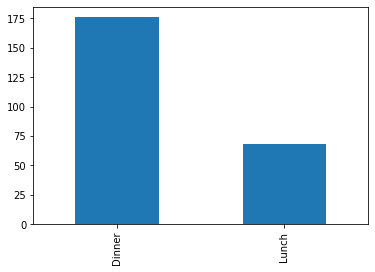

In [8]:
data['time'].value_counts().plot(kind='bar')

## Automate below process
#### handling missing values
#### categorical feature
#### handling outliers
#### feature scalling

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [11]:
## encoding technique
## label encode for target variabele
from sklearn.preprocessing import LabelEncoder
enoder=LabelEncoder()
data['time']=enoder.fit_transform(data.time)

In [14]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,0,2
1,10.34,1.66,Male,No,Sun,0,3
2,21.01,3.50,Male,No,Sun,0,3
3,23.68,3.31,Male,No,Sun,0,2
4,24.59,3.61,Female,No,Sun,0,4


In [20]:
## independent and dependet feature
X=data.drop(labels='time',axis=1)
y=data['time']

In [22]:
X.head()

,total_bill,tip,sex,smoker,day,size
0,16.99,1.01,Female,No,Sun,2
1,10.34,1.66,Male,No,Sun,3
2,21.01,3.50,Male,No,Sun,3
3,23.68,3.31,Male,No,Sun,2
4,24.59,3.61,Female,No,Sun,4


In [19]:
from sklearn.model_selection import  train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
from sklearn.impute import SimpleImputer   # handling missing values
from sklearn.preprocessing import OneHotEncoder  # handling categorical feature
#### Handling outliersfrom
from sklearn.preprocessing import StandardScaler ##  feature scalling

## Pipeline

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 

In [36]:
## seprate the numerical and categorical varibale
category_col=['sex','smoker','day']
numeric_col=['total_bill','tip','size']

## Feature enginering automation

In [33]:
#numerical pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='mean')),## handling the missing values
    ('scaler',StandardScaler()),##  numerical feature
    ]    
)

#categorical pipeline
cate_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),## handling the missing values
    ('onehotencoder',OneHotEncoder()), ##categorical feature
    ]    
)

In [37]:
## wrapper method column tranfer
preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,numeric_col),
    ('cate_pipeline',cate_pipeline,category_col),
])

In [39]:
X_train=preprocessor.fit_transform(X_train)

In [40]:
X_test=preprocessor.transform(X_test)

## Random forest classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [70]:
## Auto mate model traning processing
model= {
    'Random forest':RandomForestClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'logistic regression': LogisticRegression(),
    'svc':SVC(),
    'gaussian Baye':GaussianNB()
        
}

In [57]:
list(model.keys())[0]

'Random forest'

In [46]:
from sklearn.metrics import accuracy_score

In [58]:
def evaluatemodel(X_train, X_test, y_train, y_test,models):
    report={}
    for i in range(len(models)):
        model=list(models.values())[i]
        ## train the model
        model.fit(X_train,y_train)
        
        ## predict the model
        y_predict=model.predict(X_test)
        
        ## get the Accuracy
        test_model_score=accuracy_score(y_test,y_predict)
        report[list(models.keys())[i]]=test_model_score
    return report

In [71]:
evaluatemodel(X_train, X_test, y_train, y_test,model)

{'Random forest': 0.9629629629629629,
 'Decision Tree': 0.9506172839506173,
 'logistic regression': 0.9876543209876543,
 'svc': 0.9753086419753086,
 'gaussian Baye': 0.9629629629629629}

In [73]:
## Hyper paremater tuning
classifier=RandomForestClassifier()

In [75]:
parameter={
    'max_depth':[3,5,10,None],
    'n_estimators':[100,200,300],
    'criterion' : ["gini", "entropy"]
}

In [76]:
from sklearn.model_selection import RandomizedSearchCV

In [77]:
rcv=RandomizedSearchCV(classifier,param_distributions=parameter,cv=5,scoring='accuracy')

In [78]:
rcv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy')

In [79]:
rcv.best_params_

{'n_estimators': 300, 'max_depth': 3, 'criterion': 'gini'}

In [81]:
y_predict=rcv.predict(X_test)

In [82]:
accuracy_score(y_test,y_predict)

0.9876543209876543